In [40]:
import sys
sys.path.append('../')
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torch
import torch.nn.functional as F
from torch.fft import fft2, ifft2, fftshift, ifftshift
import galsim
from utils.utils_data import Galaxy_Dataset
from utils.utils import PSNR, estimate_shear

%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [41]:
snrs = [20, 40, 60, 80, 100, 150, 200, 300]
data_path = '/mnt/WD6TB/tianaoli/dataset/LSST_23.5_new/'
idx = 2365

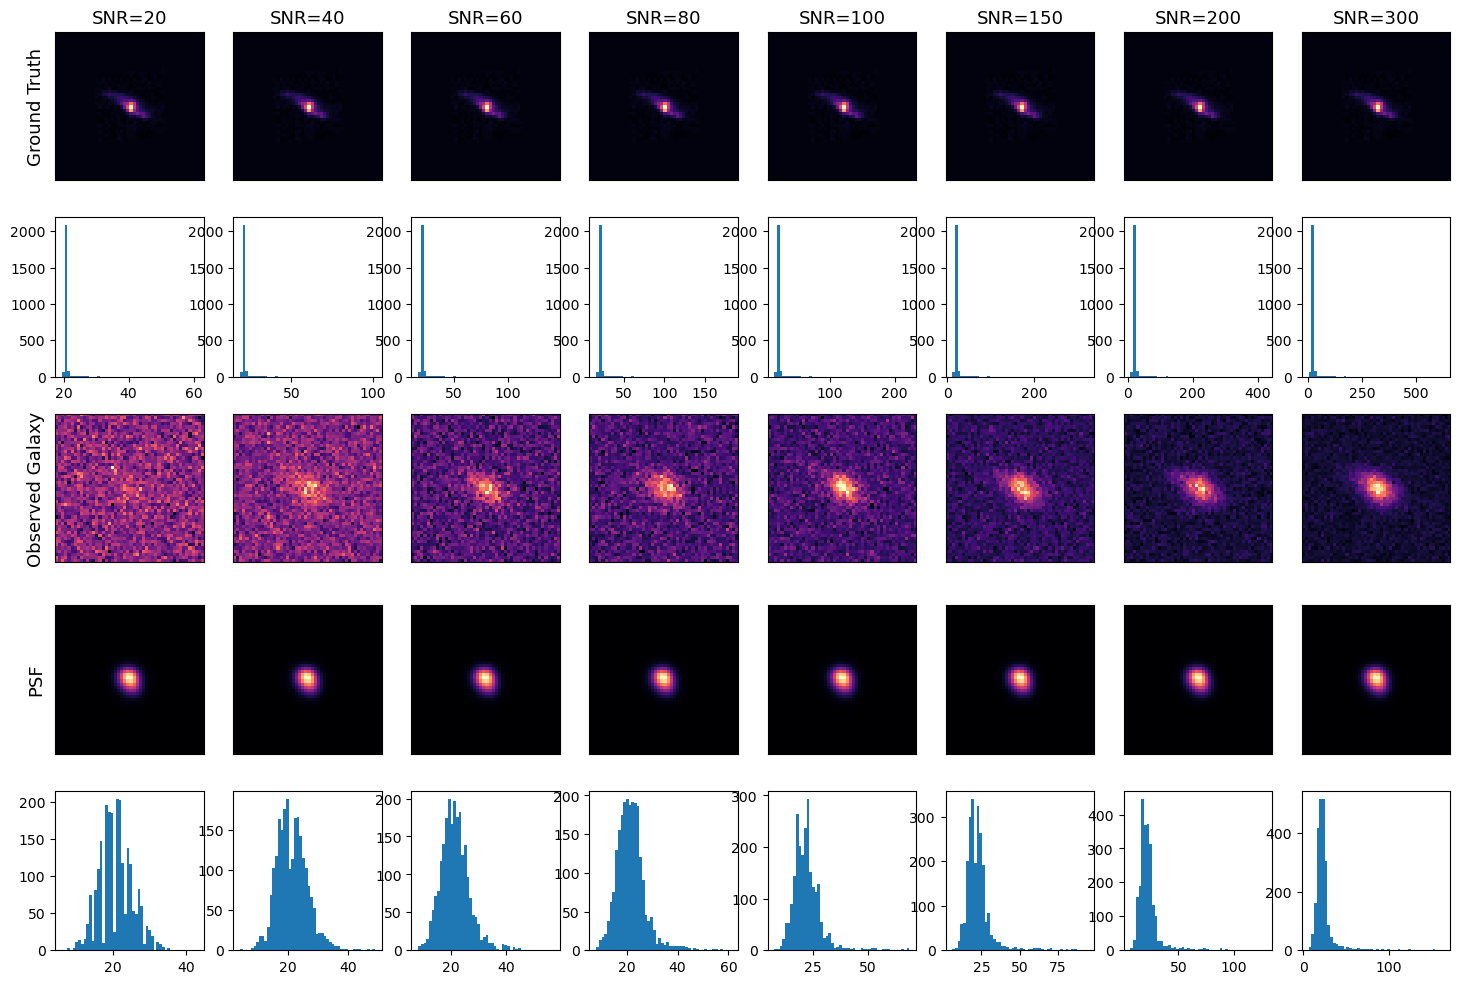

In [42]:
plt.figure(figsize=(18, 12))
cmap = 'magma'

for i, snr in enumerate(snrs):
    test_loader = Galaxy_Dataset(data_path=data_path, train=False, 
                                 psf_folder='psf/', obs_folder=f'obs_{snr}/', gt_folder=f'gt_{snr}/')
    (obs, psf, alpha), gt = test_loader[idx]
    
    ax0 = plt.subplot(5, len(snrs), i+1)
    plt.imshow(gt.squeeze(dim=0).squeeze(dim=0).cpu(), cmap=cmap)
    plt.title(f'SNR={snr}', fontsize=13)
    ax0.set_xticks([])
    ax0.set_yticks([])
    
    ax1 = plt.subplot(5, len(snrs), i+1+len(snrs))
    plt.hist(gt.squeeze(dim=0).squeeze(dim=0).cpu().ravel(), bins=50)
    # ax1.set_xlim(10,100)
    
    ax2 = plt.subplot(5, len(snrs), i+1+2*len(snrs))
    plt.imshow(obs.squeeze(dim=0).squeeze(dim=0).cpu(), cmap=cmap)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    
    ax3 = plt.subplot(5, len(snrs), i+1+3*len(snrs))
    plt.imshow(psf.squeeze(dim=0).squeeze(dim=0).cpu(), cmap=cmap)
    ax3.set_xticks([])
    ax3.set_yticks([])
    
    ax4 = plt.subplot(5, len(snrs), i+1+4*len(snrs))
    plt.hist(obs.squeeze(dim=0).squeeze(dim=0).cpu().ravel(), bins=50)
    # ax4.set_xlim(10,100)
    
    if i == 0:
        ax0.set_ylabel('Ground Truth', fontsize=13)
        ax2.set_ylabel('Observed Galaxy', fontsize=13)
        ax3.set_ylabel('PSF', fontsize=13)

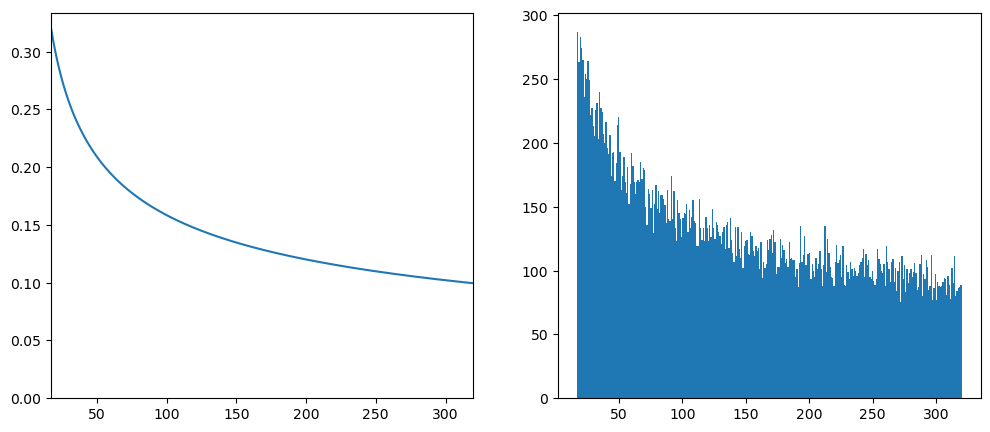

In [67]:
snr = np.linspace(17, 320, 200)
freqs = 1/(snr ** 0.4)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(snr, freqs)
plt.xlim(17,320)
plt.ylim(0,)

rng_snr = galsim.DistDeviate(function=lambda x: 1/(x**0.4), x_min=17, x_max=320, npoints=1000)
freqs = []
for i in range(0, 39000):
    freqs.append(rng_snr())
    
plt.subplot(1,2,2)
plt.hist(freqs, bins=300)
plt.show()